In [2]:
import numpy as np
import matplotlib.pyplot as plt

# LatentVelo runtimes

In [3]:
names = ['mouse_erythroid', 'scnt', 'organoid', 'pancreas', 
         'mouse_hematopoiesis', 'bonemarrow', 'dentate_gyrus', 'retina', 'hindbrain', 'hindbrain_gaba']

nice_names = ['Mouse erythroid', 'scNT neurogenesis', 'Intestinal organoid', 'Pancreas',
             'Mouse hematopoiesis', 'Human bonemarrow', 'Dentate Gyrus', 'Retina', 'Hindbrain (oligo)',
             'Hindbrain (GABA, Glial)']

size = [5780, 3831, 2531,0,2726, 3066, 2930, 6253, 1772]

times = {}
sizes = {}
for i,name in enumerate(names):
    t = np.load('real_data/robustness_fit_seeds_times/'+name+'_times.npy')/60.0
    meta = np.load('real_data/robustness_fit_seeds_times/'+name+'_meta.npy')
    times[nice_names[i]] = []
    sizes[nice_names[i]] = []
    for j in t:
        times[nice_names[i]].append(j)
        sizes[nice_names[i]].append(meta[0]) 

In [4]:
import pandas as pd
times_df = pd.DataFrame(times)
sizes_df = pd.DataFrame(sizes)

df_ltv = times_df.melt(
        var_name="Dataset", 
        value_name="Times")

sizes_df = sizes_df.melt(
        var_name="Dataset", 
        value_name="Sizes")

df_ltv['Sizes'] = sizes_df['Sizes']

/home/spencer/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# scVelo

In [5]:
names = ['mouse_erythroid', 'scnt', 'organoid', 'pancreas', 
         'mouse_hematopoiesis', 'bonemarrow', 'dentate_gyrus', 'retina', 'hindbrain', 'hindbrain_gaba']
nice_names = ['Mouse erythroid', 'scNT neurogenesis', 'Intestinal organoid', 'Pancreas',
             'Mouse hematopoiesis', 'Human bonemarrow', 'Dentate Gyrus', 'Retina', 'Hindbrain (oligo)',
             'Hindbrain (GABA, Glial)']
size = [5780, 3831, 2531,0,2726, 3066, 2930, 6253, 1772]#, 30000]

times4 = {}
times8 = {}
sizes = {}
for i,name in enumerate(names):
    t4 = np.load('real_data/scvelo/times/'+name+'_times_4cpu.npy')/60.0
    t8 = np.load('real_data/scvelo/times/'+name+'_times_8cpu.npy')/60.0
    meta = np.load('real_data/robustness_fit_seeds_times/'+name+'_meta.npy')
    times4[nice_names[i]] = []
    times8[nice_names[i]] = []
    sizes[nice_names[i]] = []
    for j in t4:
        times4[nice_names[i]].append(j) 
        sizes[nice_names[i]].append(meta[0]) 
    for j in t8:
        times8[nice_names[i]].append(j) 

In [6]:
import pandas as pd
times4_df = pd.DataFrame(times4)
times8_df = pd.DataFrame(times8)
sizes_df = pd.DataFrame(sizes)

df4 = times4_df.melt(
        var_name="Dataset", 
        value_name="Times")

df8 = times8_df.melt(
        var_name="Dataset", 
        value_name="Times")

sizes_df = sizes_df.melt(
        var_name="Dataset", 
        value_name="Sizes")

#df['Times8'] = df8['Times8']
df4['Sizes'] = sizes_df['Sizes']
df4['Model'] = 'scVelo 4 core'
df8['Sizes'] = sizes_df['Sizes']
df8['Model'] = 'scVelo 8 core'
df_ltv['Model'] = 'LatentVelo'

In [7]:
df = pd.concat([df4, df8, df_ltv])

In [8]:
df

,Dataset,Times,Sizes,Model
0,Mouse erythroid,2.735632,9815,scVelo 4 core
1,scNT neurogenesis,0.232935,3066,scVelo 4 core
2,Intestinal organoid,0.461416,3831,scVelo 4 core
3,Pancreas,1.286257,2531,scVelo 4 core
4,Mouse hematopoiesis,0.510456,1772,scVelo 4 core
5,Human bonemarrow,1.539601,5780,scVelo 4 core
6,Dentate Gyrus,1.104411,2930,scVelo 4 core
7,Retina,1.848952,2726,scVelo 4 core
8,Hindbrain (oligo),2.202239,6253,scVelo 4 core
9,"Hindbrain (GABA, Glial)",7.664505,13501,scVelo 4 core


<ipython-input-9-ce485090e0db>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Dataset').mean()


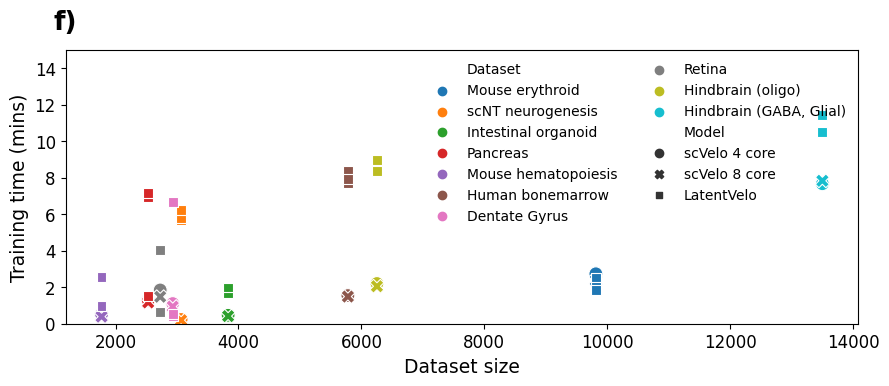

In [9]:
import seaborn as sns

fig,ax = plt.subplots(figsize=(9,4))


ax.text(0.0, 1.1, 'f)', horizontalalignment='center', 
           verticalalignment='center', transform=ax.transAxes,
          fontweight='bold', fontsize=19)

ax = sns.scatterplot(data = df, x='Sizes', y='Times', hue='Dataset', style = 'Model', s=100)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
means = df.groupby('Dataset').mean()

plt.ylim(0,15)

plt.xlabel('Dataset size', fontsize=13.5)
plt.ylabel('Training time (mins)', fontsize=13.5)
plt.legend(ncol=2, frameon=False)
ax.tick_params(labelsize=12)
#for i in np.arange(len(means)):
#    txt = means.index.values[i]
#    plt.annotate(txt, (means['Sizes'][i]-500, means['Times'][i]+2))
plt.tight_layout()
plt.savefig('figures/runtime.pdf')
plt.show()